# Naive Bayes
Naive Bayes is one of the most famous classification techniques, one of the most simplest ones, and the easiest to apply.

## Evaluation Metrics
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

### Accuracy
_Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right._

**A = (TP+TN)/(TP+TN+FP+FN)**


### Recall
_What proportion of actual positives was identified correctly?_

**R = TP/(TP+FN)**

### Precision
_What proportion of positive identifications was actually correct?_

**P = TP/(TP+FP)**

## Heart Failure Dataset
We will be using the Heart Failure Dataset with the out of the box values.

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')
    
    
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Prepare and split data

In [2]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
if(labels[0] == 1):
    temp = labels[0]
    labels[0] = labels[1]
    labels[1] = temp
    
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [3]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

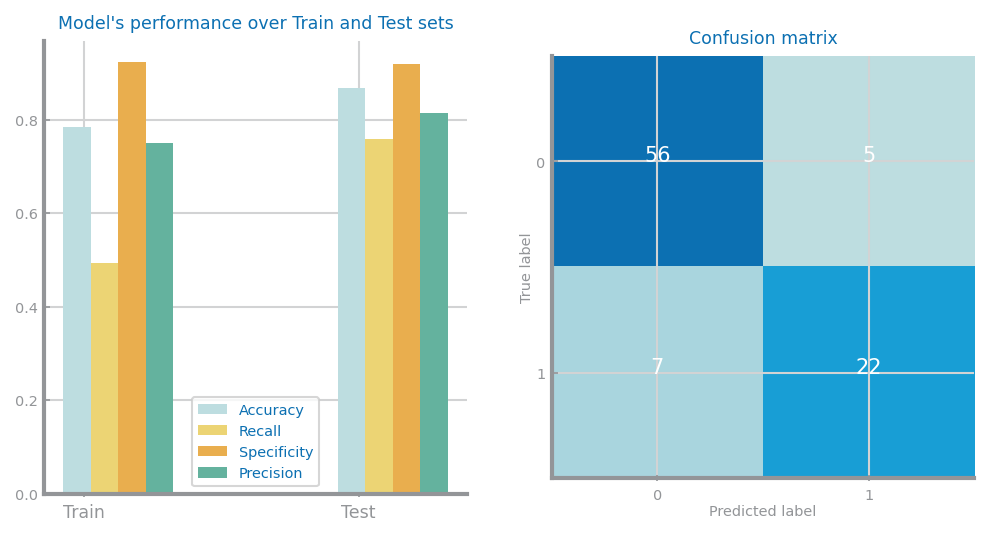

In [4]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

In [5]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

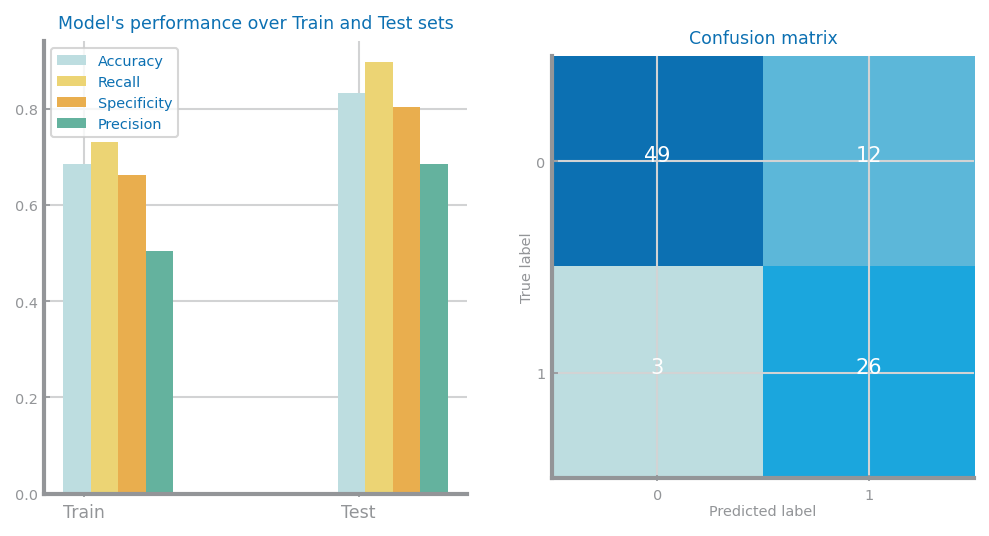

In [6]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Bernoulli Naive Bayes Estimator

In [7]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

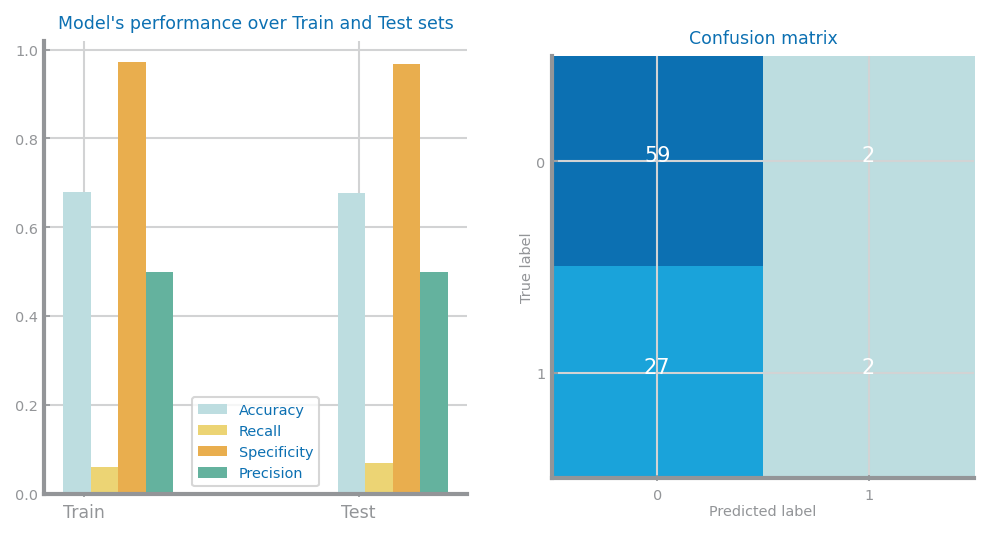

In [8]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Comparison

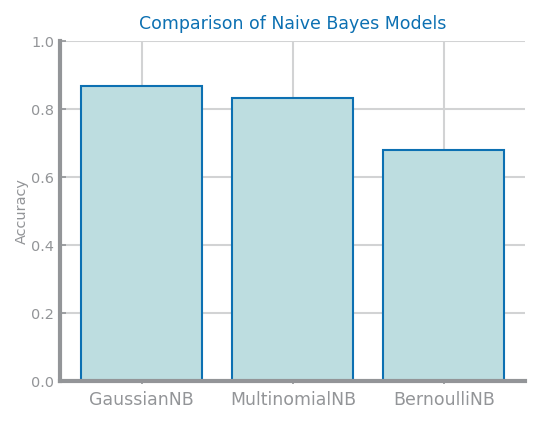

"\n# Precision\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.precision_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)\nplt.show()\n\n\n# Recall\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.recall_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)\nplt.show()\n"

In [9]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()


'''
# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()
'''

## Heart Failure Dataset (Standardized)
We will be using the Heart Failure Dataset with the standardized values produced in the Scaling section.

### Imports and data loading

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_standardized.csv')
    
    
data.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


### Prepare and split data

In [11]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
if(labels[0] == 1):
    temp = labels[0]
    labels[0] = labels[1]
    labels[1] = temp
    
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [12]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

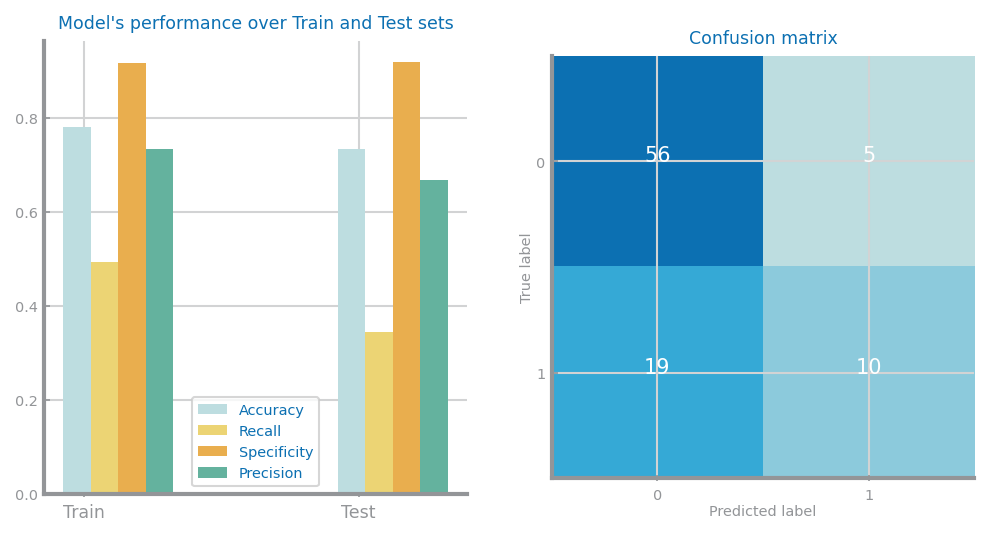

In [13]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

MultinomialNB assumes that features have multinomial distribution which is a generalization of the binomial distribution. Neither binomial nor multinomial distributions can contain negative values.

### Bernoulli Naive Bayes Estimator

In [14]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

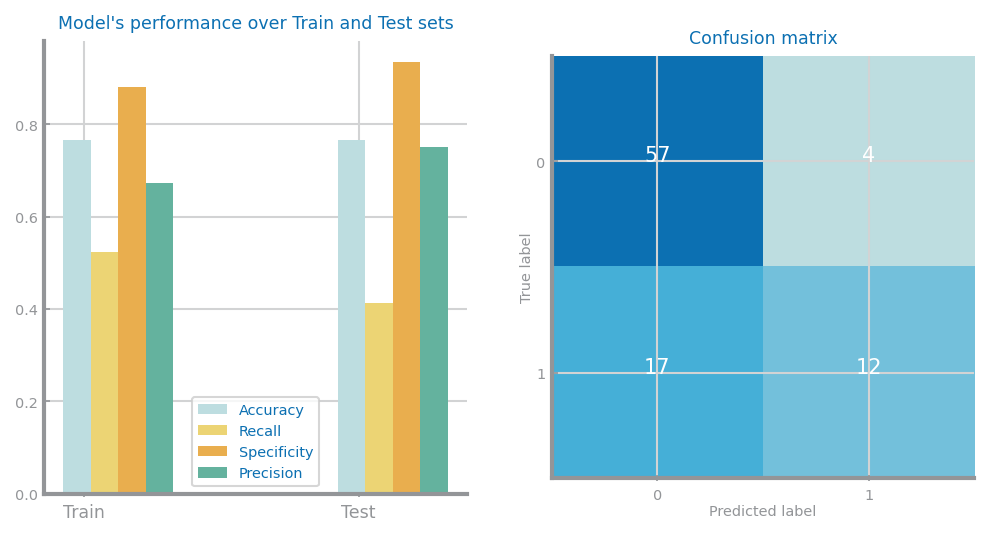

In [15]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Comparison

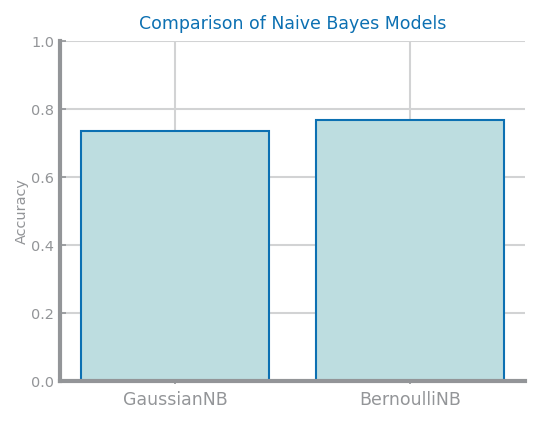

"\n# Precision\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.precision_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)\nplt.show()\n\n\n# Recall\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.recall_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)\nplt.show()\n"

In [16]:
estimators = {'GaussianNB': GaussianNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()


'''
# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()
'''

## Heart Failure Dataset (Normalized)
We will be using the Heart Failure Dataset with the normalized values produced in the Scaling section.

### Imports and data loading

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_normalized.csv')
    
    
data.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0,1
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0,1
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0,1
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0,1


### Prepare and split data

In [18]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
if(labels[0] == 1):
    temp = labels[0]
    labels[0] = labels[1]
    labels[1] = temp
    
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [19]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

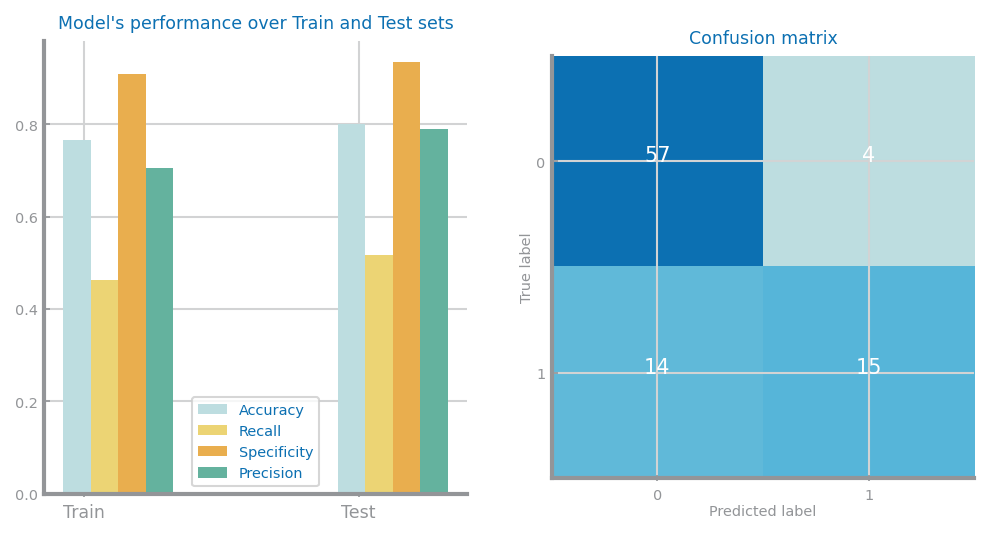

In [20]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

In [21]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

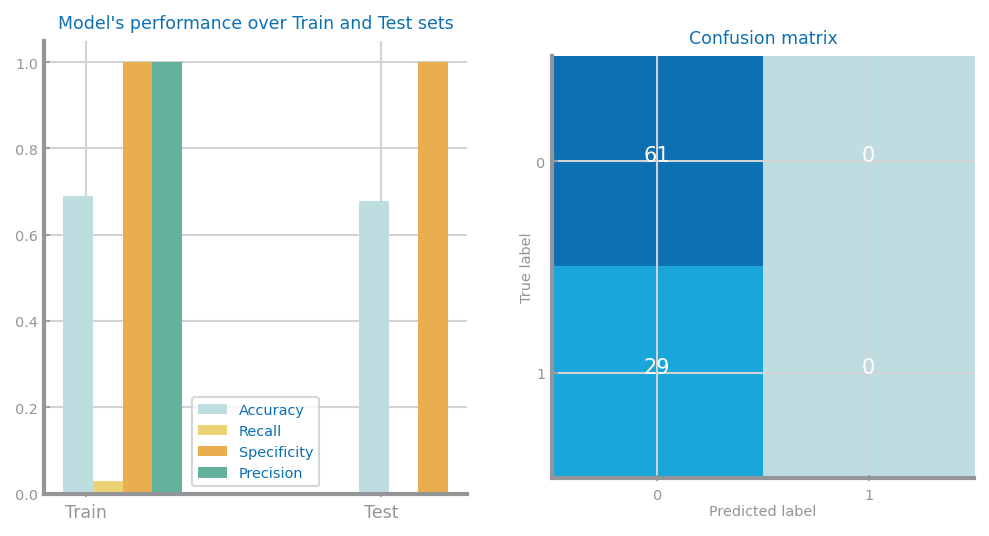

In [22]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Bernoulli Naive Bayes Estimator

In [23]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

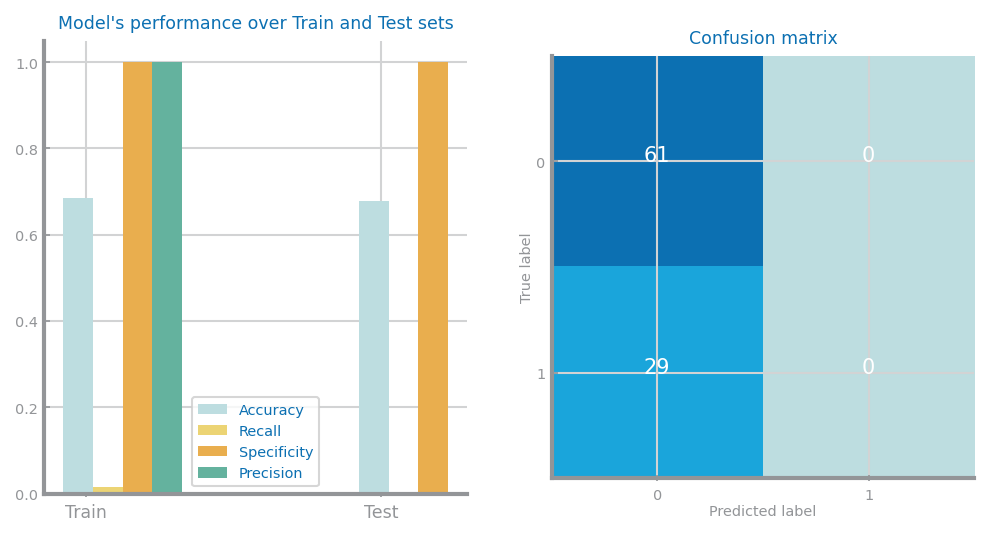

In [24]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Comparison

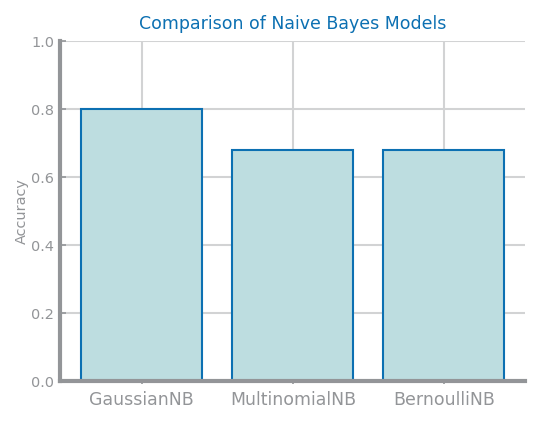

"\n# Precision\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.precision_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)\nplt.show()\n\n\n# Recall\nxvalues = []\nyvalues = []\nfor clf in estimators:\n    xvalues.append(clf)\n    estimators[clf].fit(trnX, trnY)\n    prdY = estimators[clf].predict(tstX)\n    yvalues.append(metrics.recall_score(tstY, prdY))\n\nplt.figure()\nds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)\nplt.show()\n"

In [25]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()


'''
# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()
'''

## Summary

**Which distribution is more adequate to model our data??**
- Regardless of the dataset used (with standardization, normalization or without any scaling) we noted that the Gaussian Naive Bayes is the one that obtained the best results (which makes sense since our data follows a Gaussian distribution)

**Is the accuracy achieved good enough??**
- Most accuracies obtained using the Gaussian Naive Bayes estimator are around 80%, which is not an absolutely amazing score, but not as bad as one would think taking into account how simple this model is

**What is the largest kind of errors??**
- Most of our problems lied in False Negatives

It should also be noted that the best accuracy obtained was when using the non-scaled dataset and with the Gaussian Naive Bayes estimator.